In [29]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import math
#import statsmodels
import statsmodels.api as sm

In [30]:
data = pd.read_excel('NYU_Spring_2019_Assignment_8_data.xls')
data.head()

,Month,S&P500,Dividends,Earnings,CPI,10-year rate,Gold,President age,Temperature
0,01/1880,5.11,0.02,0.03,9.99,0.0402,20.67,687,-0.29
1,02/1880,5.20,0.02,0.03,9.99,0.0399,20.67,688,-0.18
2,03/1880,5.30,0.02,0.03,10.09,0.0397,20.67,689,-0.11
3,04/1880,5.18,0.02,0.03,9.70,0.0394,20.67,690,-0.19
4,05/1880,4.77,0.02,0.04,9.42,0.0391,20.67,691,-0.11


# Question 1: Transform the series as follows. Think about why these are (or perhaps are not) reasonable transformations, and what assumptions about the data might justify them.

(1) Take the natural logarithm of the S&P500 price
(2) Compute the dividend yield as dividend divided by price
(3) Take the natural logarithm of earnings
(4) Take the natural logarithm of CPI
(5) Leave the 10-year rate untransformed
(6) Take the natural logarithm of the price of gold
(7) Accumulate the President's age, that is each month take the previous month's value (start at zero) and add the current month's value

In [45]:
transform_data = pd.DataFrame(data["Month"])

transform_data["log_S&P"] = np.log(data["S&P500"])
transform_data["Dividend_yield"] = data["Dividends"]/data["S&P500"]
transform_data["log_earning"] = np.log(data["Earnings"])
transform_data["log_CPI"] = np.log(data["CPI"])
transform_data["log_gold"] = np.log(data["Gold"])
transform_data["10-year rate"] = (data["10-year rate"])
transform_data["Temperature"] = (data["Temperature"])
transform_data["Accumulate_president"] = data["President age"]
for i in range (len(transform_data)):
    transform_data["Accumulate_president"][i] = sum(data["President age"][0:i+1])
transform_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Month,log_S&P,Dividend_yield,log_earning,log_CPI,log_gold,10-year rate,Temperature,Accumulate_president
0,01/1880,1.631199,0.003914,-3.506558,2.301585,3.028683,0.0402,-0.29,687
1,02/1880,1.648659,0.003846,-3.506558,2.301585,3.028683,0.0399,-0.18,1375
2,03/1880,1.667707,0.003774,-3.506558,2.311545,3.028683,0.0397,-0.11,2064
3,04/1880,1.644805,0.003861,-3.506558,2.272126,3.028683,0.0394,-0.19,2754
4,05/1880,1.562346,0.004193,-3.218876,2.242835,3.028683,0.0391,-0.11,3445


# Question 2: Graph each of the transformed series and look at the partial autocorrelations out to lag 32. Comment briefly on features you see in the graphs, and how these relate to the partial autocorrelations. 
Question: What is partial autocorrelation? 

Text(0.5,1,'Log S&P')

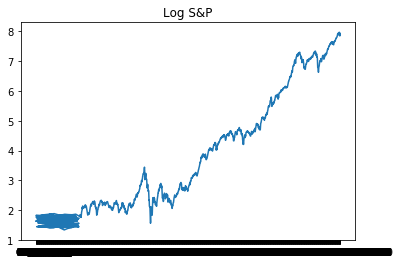

In [39]:
plt.plot(transform_data['Month'], transform_data['log_S&P']) 
plt.title('Log S&P')

Text(0.5,1,'Dividend_yield')

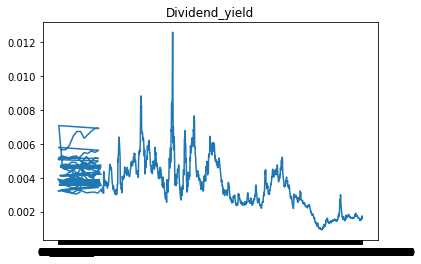

In [40]:
plt.plot(transform_data['Month'], transform_data['Dividend_yield']) 
plt.title('Dividend_yield')

Text(0.5,1,'Log Earnings')

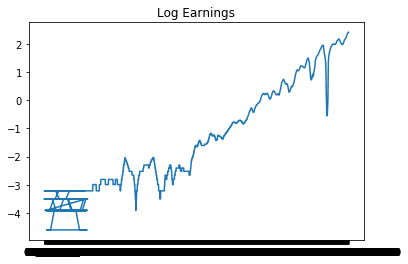

In [41]:
plt.plot(transform_data['Month'], transform_data['log_earning']) 
plt.title('Log Earnings')

Text(0.5,1,'Log CPI')

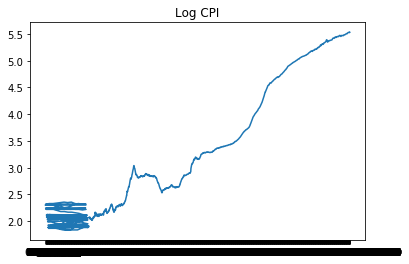

In [42]:
plt.plot(transform_data['Month'], transform_data['log_CPI']) 
plt.title('Log CPI')

Text(0.5,1,'Log Gold')

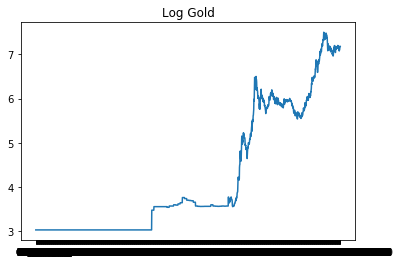

In [43]:
plt.plot(transform_data['Month'], transform_data['log_gold']) 
plt.title('Log Gold')

Text(0.5,1,'President Age')

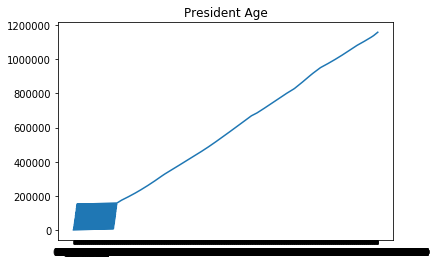

In [44]:
plt.plot(transform_data['Month'], transform_data['Accumulate_president']) 
plt.title('President Age')

Log S&P price goes up with CPI, which means that the intrinsic value of stock has not change.

# Question 3: Compute the correlation matrix for the eight series. Comment on it briefly.

In [46]:
new_data = np.array(transform_data[["log_S&P","Dividend_yield","log_earning", "log_CPI", "10-year rate","log_gold","Accumulate_president","Temperature"]].values)
cov_mat = np.cov(new_data, rowvar = False)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7
0,3.886705,-0.002181,3.550684,2.268626,0.015062,2.582568,6.418455e+05,0.603115
1,-0.002181,0.000002,-0.001821,-0.001129,-0.000004,-0.001275,-3.182640e+02,-0.000316
2,3.550684,-0.001821,3.364429,2.117398,0.016490,2.411197,6.017107e+05,0.548610
3,2.268626,-0.001129,2.117398,1.383453,0.011188,1.577196,3.874644e+05,0.359341
4,0.015062,-0.000004,0.016490,0.011188,0.000554,0.013164,2.888136e+03,0.001490
5,2.582568,-0.001275,2.411197,1.577196,0.013164,1.989590,4.313459e+05,0.433655
6,641845.528870,-318.264028,601710.724741,387464.397921,2888.135899,431345.911537,1.150764e+11,100272.570918
7,0.603115,-0.000316,0.548610,0.359341,0.001490,0.433655,1.002726e+05,0.125475


# Question 4: Regress the month t S&P500 price on all eight variables from month t-1. Comment briefly on the results. Look at the t-statistics of the coefficients, including the constant term, and also consider the economic significance of the size of the coefficients. What do standard regression diagnostics say about the quality of the fit?

In [49]:
#ask Zeshun for how to do regression - check myself on why [1:] and [:-1]
regression_data = transform_data[["Dividend_yield","log_earning", "log_CPI", "10-year rate","log_gold","Accumulate_president","Temperature"]][:-1].copy()
regression_data["log_S&P"] = transform_data["log_S&P"][1:].values

regression_data = sm.add_constant(regression_data)
X = ["Dividend_yield","log_earning", "log_CPI", "10-year rate","log_gold","Accumulate_president","Temperature","const"]
reg = sm.OLS(endog=regression_data["log_S&P"], exog=regression_data[X]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_S&P   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.301e+04
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:56:43   Log-Likelihood:                 325.32
No. Observations:                1669   AIC:                            -634.6
Df Residuals:                    1661   BIC:                            -591.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Dividend_yield        -242.2885      4.922    -49.225      0.000    -251.943    -232.634
log_earning              0.4146      0.015     27.258      0.000       0.385       0.444
log_CPI                  0.7235      0.031     23.686      0.000       0.664       0.783
10-year rate            -3.4408      0.254    -13.553      0.000      -3.939      -2.943
log_gold                 0.0092      0.012      0.734      0.463      -0.015       0.034
Accumulate_president  2.607e-07   6.72e-08      3.877      0.000    1.29e-07    3.93e-07
Temperature              0.1149      0.031      3.661      0.000       0.053       0.176
const                    2.7313      0.099     27.640      0.000       2.537       2.925
==============================================================================
Omnibus:                      145.990   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              520.958
Skew:                           0.382   Prob(JB):                    7.51e-114
Kurtosis:                       5.628   Cond. No.                     6.66e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

S&P 500 price is negatively related to divident yield.

# Question 5: Repeat 4 for the price of gold in month t as the dependent variable.

In [50]:
regression_data = transform_data[["log_S&P","Dividend_yield","log_earning", "log_CPI", "10-year rate","Accumulate_president","Temperature"]][:-1].copy()
regression_data["log_gold"] = transform_data["log_gold"][1:].values

regression_data = sm.add_constant(regression_data)
X = ["log_S&P","Dividend_yield","log_earning", "log_CPI", "10-year rate","Accumulate_president","Temperature","const"]
reg = sm.OLS(endog=regression_data["log_gold"], exog=regression_data[X]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_gold   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     2826.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:59:04   Log-Likelihood:                -807.33
No. Observations:                1669   AIC:                             1631.
Df Residuals:                    1661   BIC:                             1674.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
log_S&P                  0.0221      0.049      0.454      0.650      -0.073       0.118
Dividend_yield          29.6549     15.283      1.940      0.052      -0.321      59.631
log_earning              0.1191      0.036      3.300      0.001       0.048       0.190
log_CPI                  1.1478      0.064     18.013      0.000       1.023       1.273
10-year rate             2.6533      0.522      5.079      0.000       1.629       3.678
Accumulate_president -1.588e-06   1.27e-07    -12.496      0.000   -1.84e-06   -1.34e-06
Temperature              0.8551      0.058     14.627      0.000       0.740       0.970
const                    1.0096      0.235      4.289      0.000       0.548       1.471
==============================================================================
Omnibus:                      113.556   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.031
Skew:                           0.002   Prob(JB):                     2.03e-09
Kurtosis:                       2.241   Cond. No.                     1.05e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 6: Repeat 5 for the dividend yield as the dependent variable.

In [51]:
regression_data = transform_data[["log_S&P","log_earning", "log_CPI", "10-year rate","log_gold","Accumulate_president","Temperature"]][:-1].copy()
regression_data["Dividend_yield"] = transform_data["Dividend_yield"][1:].values

regression_data = sm.add_constant(regression_data)
X = ["log_S&P","log_earning", "log_CPI", "10-year rate","log_gold","Accumulate_president","Temperature","const"]
reg = sm.OLS(endog=regression_data["Dividend_yield"], exog=regression_data[X]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Dividend_yield   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     918.4
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:00:08   Log-Likelihood:                 9889.0
No. Observations:                1669   AIC:                        -1.976e+04
Df Residuals:                    1661   BIC:                        -1.972e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
log_S&P                 -0.0024   5.09e-05    -47.924      0.000      -0.003      -0.002
log_earning              0.0007    5.7e-05     13.120      0.000       0.001       0.001
log_CPI                  0.0017      0.000     15.673      0.000       0.001       0.002
10-year rate            -0.0042      0.001     -4.873      0.000      -0.006      -0.003
log_gold              5.827e-05   4.05e-05      1.439      0.150   -2.12e-05       0.000
Accumulate_president  1.009e-09   2.17e-10      4.644      0.000    5.83e-10    1.44e-09
Temperature              0.0002      0.000      2.144      0.032    1.87e-05       0.000
const                    0.0075      0.000     21.861      0.000       0.007       0.008
==============================================================================
Omnibus:                      935.169   Durbin-Watson:                   0.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15744.877
Skew:                           2.255   Prob(JB):                         0.00
Kurtosis:                      17.355   Cond. No.                     3.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""